**1. Activation Functions and Their Implementation in Python**

In [ ]:
inputs = np.array([[3, 1]])
weights_1 = np.array([[0.1, 0.2], [0.3, 0.4]])
biases_1 = np.array([0.5, 0.6])
weights_2 = np.array([[0.7], [0.8]])
biases_2 = np.array([0.9])


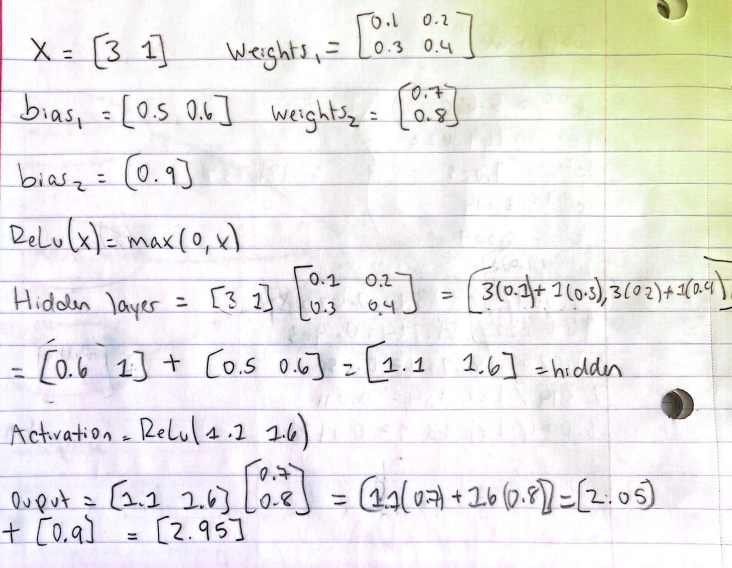

In [ ]:
import numpy as np
from tensorflow import keras
#Inputs
inputs = np.array([[3, 1]])
nn = keras.Sequential()
nn.add( keras.layers.Input( shape=(2,) ) )                #2 input nodes
nn.add( keras.layers.Dense(2, activation="relu"))         #Hidden layer with 2 nodes
nn.add( keras.layers.Dense(1) )                           #Output layer with 1 node

#Establishing the learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.01)
nn.compile(optimizer=optimizer, loss="mse")

#Establishing weights and biases
weights_1 = np.array([[0.1, 0.2], [0.3, 0.4]])
biases_1 = np.array([0.5, 0.6])
nn.layers[0].set_weights([weights_1, biases_1])
weights_2 = np.array([[0.7], [0.8]])
biases_2 = np.array([0.9])
nn.layers[1].set_weights([weights_2, biases_2])

#Prediction
prediction = nn.predict(inputs)
print(f"Predicted output: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted output: [[2.9500003]]


**2. Vanishing/Exploding Gradients**

Vanishing gradient problem:
This problem occurs with "dimmer switch" activations like sigmoid, that squeeze information. The issue is that more data does not resulting in better learning, and the gradients become smaller and smaller during backpropagation until it vanishes.

Exploding gradients: This is an issue that occurs when gradients become too large. High weights result in high derivatives, which can hinder convergence and prevent learning. The ReLU activation function could lead to this issue as it allows for large positive inputs.

**3. Hyperparameter Tuning**

**Baseline:**

*   Activation = ReLU
*   2 hidden layers with 12 neurons
*   Epochs = 100




In [ ]:
#Loading diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data = load_diabetes()
x = data.data
y = data.target

#Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Original size:", x.shape)
print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

Original size: (442, 10)
Training size: (353, 10)
Testing size: (89, 10)


In [ ]:

nn = keras.Sequential()
nn.add( keras.layers.Input( shape=(10,) ) )                       #Input layer
nn.add( keras.layers.Dense(12, activation="relu"))                #1st hidden layer, 12 nodes, with relu for nonlinearity
nn.add( keras.layers.Dense(12, activation="relu"))                #2nd hidden layer, 12 nodes, with relu for nonlinearity
nn.add( keras.layers.Dense(1) )                                   #Output layer

#Compiling the model using Adam and MSE
nn.compile(optimizer="adam", loss="mse")
#Model training
history = nn.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)
history

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29049.0977
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30946.3887 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31427.7676 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30901.4004 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28255.6191 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29636.6895 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30033.6055 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30272.0137 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29406.7051 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31940.6152 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29603.2891 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30502.3320  
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28249.8926 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28548.8984 
E

In [ ]:
from sklearn.metrics import mean_absolute_error
#Prediction
predictions = nn.predict(x_test)
#Evaluation
mean_absolute_error(y_test, predictions) #Evaluating using the testing data

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


52.51830463195115

**Model 1:**


*  Activation = sigmoid
*  2 hidden layers with 12 neurons
*  Epochs = 100


In [ ]:
#Recreating the network using sigmoid activation
nn = keras.Sequential()
nn.add( keras.layers.Input( shape=(10,) ) )
nn.add( keras.layers.Dense(12, activation="sigmoid"))
nn.add( keras.layers.Dense(12, activation="sigmoid"))
nn.add( keras.layers.Dense(1) )

#Compiling the model using Adam and MSE
nn.compile(optimizer="adam", loss="mse")

#Model training
history = nn.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)
history


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31642.0977
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30537.5312 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30948.1094 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30305.4766 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32607.0312 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31518.1035 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31261.6113  
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30789.6660 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31266.1895 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28743.3223 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31109.2363 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29209.3066 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28844.6875 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29338.5195 
E

In [ ]:
#Prediction and evaluation

predictions = nn.predict(x_test)
mean_absolute_error(y_test, predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


121.89320788222753

Chaning from ReLU to the sigmoid activation function has resulted in a large increase in model error.

**Model 2:**
*   Activation = ReLU
*   3 hidden layers with 12 neurons
*   Epochs = 100





In [ ]:
#Recreating the network using 3 hidden layers
nn = keras.Sequential()
nn.add( keras.layers.Input( shape=(10,) ) )
nn.add( keras.layers.Dense(12, activation="relu"))
nn.add( keras.layers.Dense(12, activation="relu"))
nn.add( keras.layers.Dense(12, activation="relu"))
nn.add( keras.layers.Dense(1) )

#Compiling the model using Adam and MSE
nn.compile(optimizer="adam", loss="mse")

#Model training
history = nn.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)
history

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 29712.2090
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30361.1523 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30672.6562 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31396.6055 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29978.7930 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30934.5996 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29606.4238 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29306.3750 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30446.3457 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29664.3242 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31754.2637 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28219.3789 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28791.2500 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30426.7070 
Ep

In [ ]:
#Prediction and evaluation

predictions = nn.predict(x_test)
mean_absolute_error(y_test, predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


48.37753655937281

Adding a third hidden layer with 12 nodes resulted in a slight decrease in error from 52.52 in the base model to 48.38 in the second model.

**Model 3:**
*   Activation = ReLU
*   2 hidden layers with 12 neurons
*   Epochs = 200



In [ ]:
nn = keras.Sequential()
nn.add( keras.layers.Input( shape=(10,) ) )
nn.add( keras.layers.Dense(12, activation="relu"))
nn.add( keras.layers.Dense(12, activation="relu"))
nn.add( keras.layers.Dense(1) )

#Compiling the model using Adam and MSE
nn.compile(optimizer="adam", loss="mse")
#Model training with 200 epochs
history = nn.fit(x_train, y_train, epochs=200, batch_size=32, verbose=1)
history

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31274.8672
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29696.5020 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30190.7773 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28582.3008 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30825.2617 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30596.6113 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30731.1758 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29531.8281 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29711.6406 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30349.5918 
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30639.2539 
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31762.5254 
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29610.2461 
Epoch 14/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30366.0605  
E

In [ ]:
#Prediction and evaluation

predictions = nn.predict(x_test)
mean_absolute_error(y_test, predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


49.4966328653057

Chaning the number of epochs from 100 to 200 resulted in a slight decrease in error from the basline model (52.52 to 49.50).

**Conclusion:**

Chaning the activation function had the largest impact on the model's accuracy (mae changed by 69.37). The model with the lowest mae was model 2 with an error of 48.38. Based on the mae, my recommendation for hyperparameter values are

*   Activation = ReLU
*   3 hidden layers with 12 neurons
*   Epochs = 100


